# **Machine Learning 2 - Classification**

# The penguins datasets
We will use this dataset in classification setting to predict the penguins’ species from anatomical information.

Each penguin is from one of the three following species: Adelie, Gentoo, and Chinstrap.

This problem is a classification problem since the target is categorical. We will limit our input data to a subset of the original features to simplify our explanations when presenting the decision tree algorithm. Indeed, we will use features based on penguins’ culmen measurement.

**Import necessary libraries:**

*   pandas is imported to handle data in a tabular format.
*   train_test_split is imported from scikit-learn to split the dataset into  training and testing sets.
*   LogisticRegression is imported from scikit-learn to create and train a logistic regression model.
*   DecisionTreeClassifier is imported from scikit-learn to create and train a decision tree model.
*   StandardScaler is imported from scikit-learn to perform feature scaling.
*   SimpleImputer is imported from scikit-learn to handle missing values.
*   classification_report is imported from scikit-learn to generate classification metrics.





In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

**Load the penguins dataset:**

In [ ]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
penguins = pd.read_csv('/content/drive/MyDrive/mdec/penguins.csv')

In [ ]:
penguins.head()

,Species,Culmen Length (mm),Culmen Depth (mm)
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0
3,Adelie,NaN,NaN
4,Adelie,36.7,19.3


In [ ]:
#
penguins.describe()

,Culmen Length (mm),Culmen Depth (mm)
count,342.000000,342.000000
mean,43.921930,17.151170
std,5.459584,1.974793
min,32.100000,13.100000
25%,39.225000,15.600000
50%,44.450000,17.300000
75%,48.500000,18.700000
max,59.600000,21.500000


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Species             344 non-null    object 
 1   Culmen Length (mm)  342 non-null    float64
 2   Culmen Depth (mm)   342 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.2+ KB


**Define feature and target columns:**

`culmen_columns` specifies the feature columns, which are "Culmen Length (mm)" and "Culmen Depth (mm)".

`target_column` specifies the target column, which is "Species".

In [ ]:
# class/target
# split into features and target
culmen_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)']

data = penguins[culmen_cols]
target = penguins['Species']

**Split the data into training and testing sets:**

The train_test_split function is used to split the data and target into training and testing sets. The random_state parameter ensures reproducibility.

In [ ]:
# 4 variables
# will return 4 values
# random_state : want to get the same data
# default test size 0.25
# shuffle, then split
data_train, data_test, target_train, target_test = train_test_split(data,target,random_state=0)

In [ ]:
# look at how many sample of our training sample
data_train.shape

(258, 2)

In [ ]:
data_test.shape

(86, 2)

In [ ]:
target_train.shape

(258,)

In [ ]:
target_test.shape

(86,)

**Handle missing values:**

Missing values in the training and testing data are imputed (filled in) with the mean of their respective columns using the SimpleImputer.

In [ ]:
imputer = SimpleImputer(strategy='mean')
data_train_imputed = imputer.fit_transform(data_train)
data_test_imputed = imputer.transform(data_test)

**Normalize the data:**

 StandardScaler is used for feature scaling (standardization). This will standardize the feature data so that each feature has a mean of 0 and a standard deviation of 1.

In [ ]:
# now, all value have same scale
# no more too large or too small
scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train_imputed)
data_test_scaled = scaler.transform(data_test_imputed)

**Make predictions and generate a classification report:**

The trained logistic regression model is used to make predictions on the scaled testing data.
A classification report is generated using classification_report, which calculates various classification metrics (e.g., precision, recall, F1-score, accuracy) for each class in the target variable.

In [ ]:
# learn & predict
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(data_train_scaled, target_train) # passing label

LogisticRegression()

In [ ]:
predictions = lr_model.predict(data_test_scaled) #
#                 ground truth /true label , predicted class label
report = classification_report(target_test, predictions)

print(report)
# f1 score = combination precision + recall
# support : numbers of test sample

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        42
   Chinstrap       0.94      1.00      0.97        15
      Gentoo       1.00      0.97      0.98        29

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.98        86
weighted avg       0.99      0.99      0.99        86



 Let's train a Decision Tree Classifier on the scaled feature data and then generate and display a classification report that includes metrics like precision, recall, F1-score, and accuracy for each class.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(data_train_scaled, target_train)

DecisionTreeClassifier()

In [ ]:
predictions = dt_model.predict(data_test_scaled) #
#                 ground truth /true label , predicted class label
report = classification_report(target_test, predictions)

print(report)
# f1 score = combination precision + recall
# support : numbers of test sample

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        42
   Chinstrap       1.00      0.93      0.97        15
      Gentoo       0.93      0.97      0.95        29

    accuracy                           0.97        86
   macro avg       0.97      0.96      0.96        86
weighted avg       0.97      0.97      0.97        86



**Exercise 1: Perceptron classifier**

Now, try to use a Perceptron classifier. You may refer to: [sklearn.linear_model.Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron)

In [ ]:
# learn & predict
from sklearn.linear_model import Perceptron

perceptron_model = Perceptron()
perceptron_model.fit(data_train_scaled, target_train)

Perceptron()

In [ ]:
predictions = perceptron_model.predict(data_test_scaled)

report = classification_report(target_test, predictions)

print(report)

              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        42
   Chinstrap       1.00      0.87      0.93        15
      Gentoo       0.97      0.97      0.97        29

    accuracy                           0.97        86
   macro avg       0.97      0.94      0.96        86
weighted avg       0.97      0.97      0.96        86



**Exercise 2: K-Nearest Neighbors classifier**

Now, try to use a K-Nearest Neighbors classifier. You may refer to: [sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [ ]:
# learn & predict
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(data_train_scaled, target_train)

KNeighborsClassifier()

In [ ]:
predictions = knn_model.predict(data_test_scaled)

report = classification_report(target_test, predictions)

print(report)

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        42
   Chinstrap       0.93      0.93      0.93        15
      Gentoo       0.97      0.97      0.97        29

    accuracy                           0.98        86
   macro avg       0.97      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



In [ ]:
# SVC
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(data_train_scaled, target_train)

SVC()

In [ ]:
predictions = svm_model.predict(data_test_scaled)

report = classification_report(target_test, predictions)

print(report)

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        42
   Chinstrap       0.94      1.00      0.97        15
      Gentoo       1.00      0.97      0.98        29

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.98        86
weighted avg       0.99      0.99      0.99        86



In [ ]:
# Data Visualization
# 1. scatter plot (different colour:hue)
# 2. lineplot for 'Culmen Depth (mm)', 'Culmen Depth (mm)'
# 3. barchart for 'Culmen Depth (mm)', 'Culmen Depth (mm)'
# 4. scatterplot matrix (corr)
# 5. boxplot for CL to find if there is outlier
# 6. boxplot for CD
# 7. pie chart (species distribution)

In [ ]:
# class/target
# split into features and target
culmen_cols = ['Culmen Depth (mm)', 'Culmen Depth (mm)']

data = penguins[culmen_cols]
target = penguins['Species']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# class/target
# split into features and target
culmen_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)']

data = penguins[culmen_cols]
target = penguins['Species']

Text(0.5, 1.0, 'Penguins Dataset')

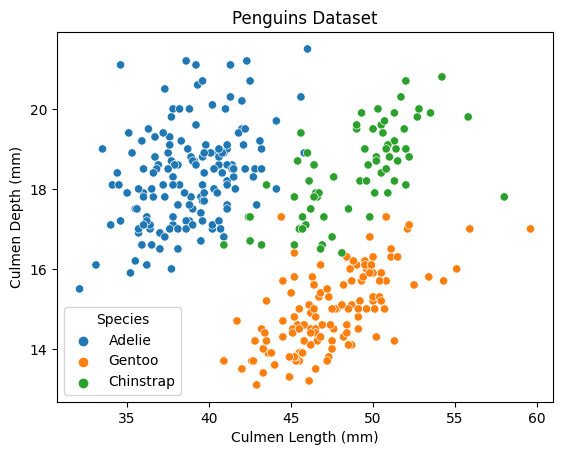

In [ ]:
# 1. scatter plot (different colour:hue)
# a)seaborn
sns.scatterplot(x=penguins['Culmen Length (mm)'], y=penguins['Culmen Depth (mm)'], hue=penguins['Species'])
plt.title('Penguins Dataset')
# hue : color map, use species

In [ ]:
# b) pandas
penguins.plot.scatter(x='Culmen Length (mm)', y='Culmen Depth (mm)', title='Penguins Dataset')


<Axes: >

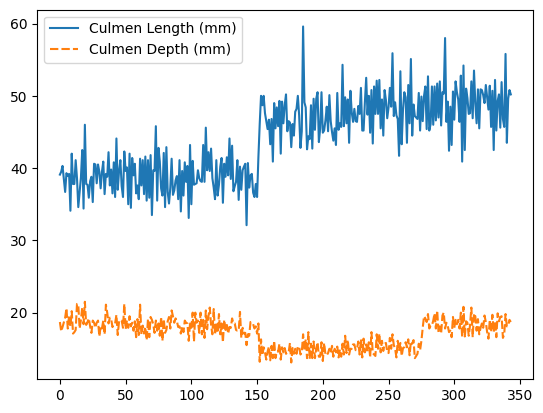

In [ ]:
# 2. lineplot for 'Culmen Depth (mm)', 'Culmen Depth (mm)'
sns.lineplot(data = penguins.drop(['Species'], axis=1))

<Axes: title={'center': 'Penguins Dataset'}>

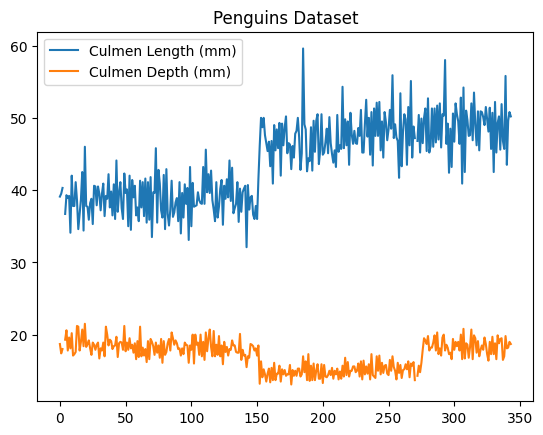

In [ ]:
# MATPLOTLIB
penguins.drop(['Species'], axis=1).plot.line(title='Penguins Dataset')

<ipython-input-84-29f1e2ead917>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins['Culmen Length (mm)'], bins=10)


<Axes: xlabel='Culmen Length (mm)', ylabel='Density'>

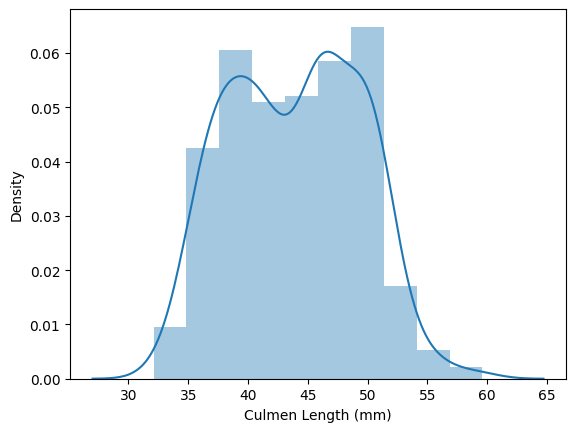

In [ ]:
#3. barchart for 'Culmen Depth (mm)', 'Culmen Depth (mm)'
# 3 (a) Culmen Length (mm)
sns.distplot(penguins['Culmen Length (mm)'], bins=10)

<ipython-input-87-084f3b4847a6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins['Culmen Depth (mm)'], bins=10)


<Axes: xlabel='Culmen Depth (mm)', ylabel='Density'>

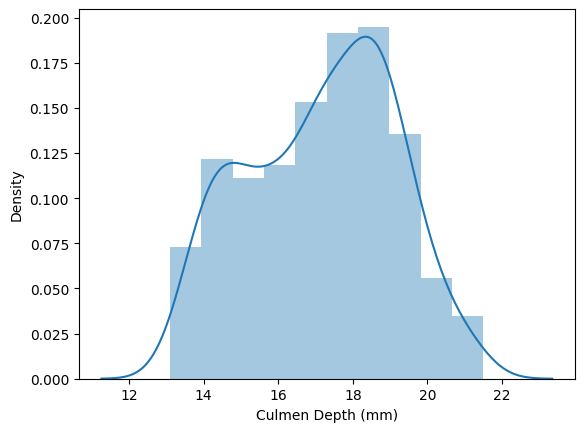

In [ ]:
#3. barchart for 'Culmen Depth (mm)', 'Culmen Depth (mm)'
# 3 (b) Culmen Depth (mm)
sns.distplot(penguins['Culmen Depth (mm)'], bins=10)

In [ ]:
mean_penguins = penguins.groupby('Species')['Culmen Length (mm)', 'Culmen Depth (mm)'].mean()
mean_penguins

<ipython-input-78-c539d677cf40>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_penguins = penguins.groupby('Species')['Culmen Length (mm)', 'Culmen Depth (mm)'].mean()


,Culmen Length (mm),Culmen Depth (mm)
Species,,
Adelie,38.791391,18.346358
Chinstrap,48.833824,18.420588
Gentoo,47.504878,14.982114


<Axes: xlabel='Species'>

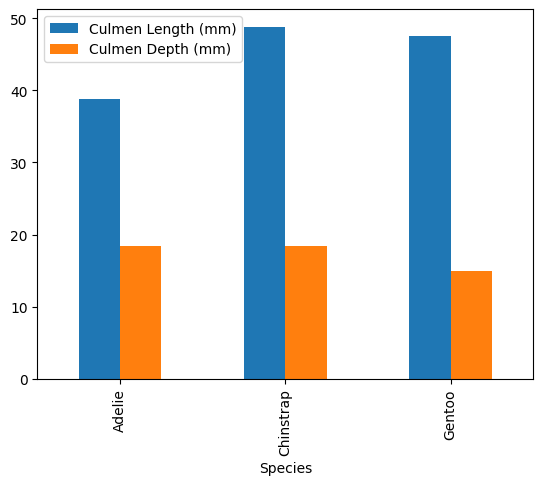

In [ ]:
mean_penguins.plot(kind='bar')

<ipython-input-80-582bdfae0672>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(penguins.corr(), annot=True)


<Axes: >

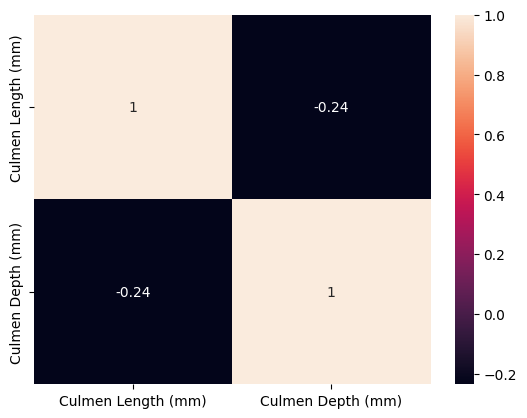

In [ ]:
# 4. scatterplot matrix (corr)
sns.heatmap(penguins.corr(), annot=True)

<Axes: xlabel='Species', ylabel='Culmen Length (mm)'>

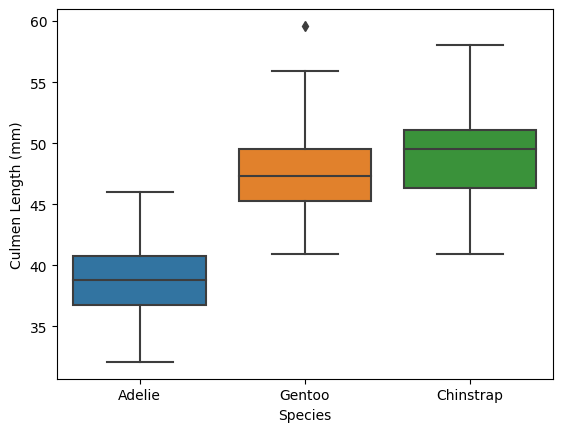

In [ ]:
# 5. boxplot for CL to find if there is outlier
sns.boxplot(x='Species', y='Culmen Length (mm)', data=penguins)

<Axes: xlabel='Species', ylabel='Culmen Depth (mm)'>

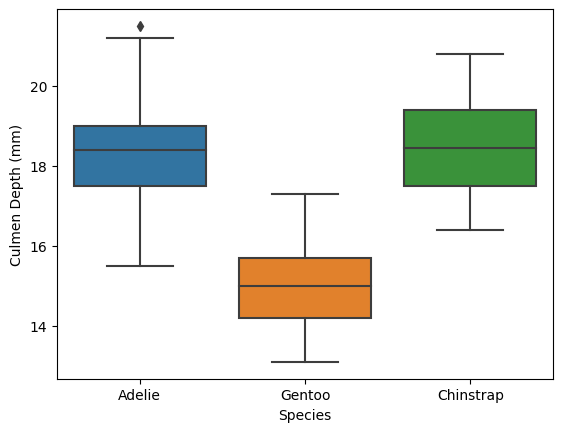

In [ ]:
# 5. boxplot for CL to find if there is outlier
sns.boxplot(x='Species', y='Culmen Depth (mm)', data=penguins)

In [ ]:
# 7. pie chart (species distribution)
sc = penguins['Species'].value_counts()
sc

Adelie       152
Gentoo       124
Chinstrap     68
Name: Species, dtype: int64

([<matplotlib.patches.Wedge at 0x7b39b33f11e0>,
 [Text(0.19980052901159365, 1.0817022458175296, 'Adelie'),
  Text(-0.7918938277833127, -0.7634816078457249, 'Gentoo'),
  Text(0.894618705053837, -0.6400448207491378, 'Chinstrap')],
 [Text(0.10898210673359653, 0.5900194068095616, '44.2%'),
  Text(-0.4319420878818069, -0.4164445133703954, '36.0%'),
  Text(0.4879738391202747, -0.34911535677225697, '19.8%')])

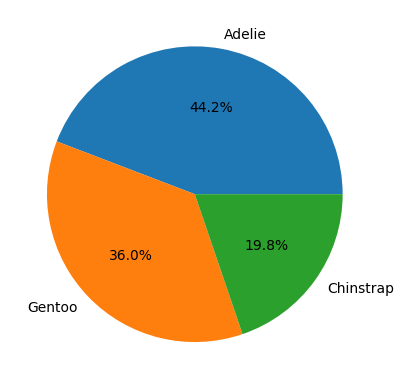

In [ ]:
plt.pie(sc, labels=sc.index, autopct='%1.1f%%')